In [1]:
# Import the required packages
# Import dependencies
# Útravaló
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Let's pour the content of nutrition.xlsx into a frame. Namely; a pandas dataFrame!
df = pd.read_excel("nutrition.xlsx")

In [16]:
# Print the shape of the dataset
print(f'Shape of the data: {df.shape}.')
# Check the first five entries of the dataset
df.head(5)

Shape of the data: (8789, 77).


,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
# Get rid of the Unnamed column
df = df.drop('Unnamed: 0', axis = 1)
df.head(1)

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g


### Exploring the data

#### See how much food contain less fat than 10g

In [18]:
# Check for NaN values in the whole dataset
for col in df:
    print(col, ': ', df[col].isna().sum());

name :  0
serving_size :  0
calories :  0
total_fat :  0
saturated_fat :  1590
cholesterol :  0
sodium :  0
choline :  0
folate :  0
folic_acid :  0
niacin :  0
pantothenic_acid :  0
riboflavin :  0
thiamin :  0
vitamin_a :  0
vitamin_a_rae :  0
carotene_alpha :  0
carotene_beta :  0
cryptoxanthin_beta :  0
lutein_zeaxanthin :  0
lucopene :  0
vitamin_b12 :  0
vitamin_b6 :  0
vitamin_c :  0
vitamin_d :  0
vitamin_e :  0
tocopherol_alpha :  0
vitamin_k :  0
calcium :  0
copper :  0
irom :  0
magnesium :  0
manganese :  0
phosphorous :  0
potassium :  0
selenium :  0
zink :  0
protein :  0
alanine :  0
arginine :  0
aspartic_acid :  0
cystine :  0
glutamic_acid :  0
glycine :  0
histidine :  0
hydroxyproline :  0
isoleucine :  0
leucine :  0
lysine :  0
methionine :  0
phenylalanine :  0
proline :  0
serine :  0
threonine :  0
tryptophan :  0
tyrosine :  0
valine :  0
carbohydrate :  0
fiber :  0
sugars :  0
fructose :  0
galactose :  0
glucose :  0
lactose :  0
maltose :  0
sucrose :  0

As it can be seen, the *saturated_fat* column has NaN values. We are interested in the saturated fat content of the foods so let us examine all the columns associated with fat content.

In [19]:
df[['total_fat', 'saturated_fat', 'fat', 'saturated_fatty_acids']].head(10)

,total_fat,saturated_fat,fat,saturated_fatty_acids
0,0.1g,NaN,0.05 g,0.009 g
1,72g,6.2g,71.97 g,6.180 g
2,0.2g,NaN,0.18 g,0.034 g
3,2.4g,0.4g,2.38 g,0.449 g
4,2g,1.2g,2.00 g,1.160 g
5,0.3g,0.1g,0.28 g,0.130 g
6,0.7g,0.2g,0.74 g,0.151 g
7,23g,10g,23.41 g,10.190 g
8,24g,15g,24.26 g,15.259 g
9,18g,2.8g,18.00 g,2.849 g


Comparing the columns it seems that the column pairs: *total_fat* with *fat* and *saturated_fat* with *saturated_fatty_acids* represent the same quantity. It seems ideal to use the second pair since it does not have NaN values. It would worth looking at the difference between values to so the extent of their similarity.<br>
Before we do so, we should realize that values in the dataFrame are not appropriate to do arithmetic operations on them.

In [20]:
# Let us check the type of 'column objects' in the dataFrame.
print(type(df['fat']))
# Check the type of data contained in the Series object by examining the value at index: 0
print(type(df['fat'][0]))
# Check one that contains a number, like calories.
print(type(df['calories'][0]))

<class 'pandas.core.series.Series'>
<class 'str'>
<class 'numpy.int64'>


In [21]:
# Check the type of data each column contain and collect the values into a list.
types = []
for col in df:
    types.append(str(type(df[col][0])))
    print(f'Data type of {col}: {type(df[col][0])}')

Data type of name: <class 'str'>
Data type of serving_size: <class 'str'>
Data type of calories: <class 'numpy.int64'>
Data type of total_fat: <class 'str'>
Data type of saturated_fat: <class 'float'>
Data type of cholesterol: <class 'int'>
Data type of sodium: <class 'str'>
Data type of choline: <class 'str'>
Data type of folate: <class 'str'>
Data type of folic_acid: <class 'str'>
Data type of niacin: <class 'str'>
Data type of pantothenic_acid: <class 'str'>
Data type of riboflavin: <class 'str'>
Data type of thiamin: <class 'str'>
Data type of vitamin_a: <class 'str'>
Data type of vitamin_a_rae: <class 'str'>
Data type of carotene_alpha: <class 'str'>
Data type of carotene_beta: <class 'str'>
Data type of cryptoxanthin_beta: <class 'str'>
Data type of lutein_zeaxanthin: <class 'str'>
Data type of lucopene: <class 'numpy.int64'>
Data type of vitamin_b12: <class 'str'>
Data type of vitamin_b6: <class 'str'>
Data type of vitamin_c: <class 'str'>
Data type of vitamin_d: <class 'str'>
D

Checking the value at index: 0 gives an idea of the data types found in the dataFrame but it is not perfect. Take a look at *saturated_fat* for example. It is clear that the column in question contains strings but since the first value is NaN, it is described as float.

In [22]:
# Let us see the distribution of value types
print(pd.Series(types).value_counts())
print('----------------------------------')
# Let us see what are the integer valued columns
for coln in df:
    if type(df[coln][0]) != str:
        print(coln, type(df[coln][0]))
# calories is kCal for sure! How about the others?

<class 'str'>            65
<class 'int'>             8
<class 'numpy.int64'>     2
<class 'float'>           1
Name: count, dtype: int64
----------------------------------
calories <class 'numpy.int64'>
saturated_fat <class 'float'>
cholesterol <class 'int'>
lucopene <class 'numpy.int64'>
hydroxyproline <class 'int'>
fructose <class 'int'>
galactose <class 'int'>
glucose <class 'int'>
lactose <class 'int'>
maltose <class 'int'>
sucrose <class 'int'>


If we would like to conveniently operate with our dataset, we need to convert the values into a 'number' format. Remember to keep track of the unit of measure to make valid operations on the data (eg.: do not add grams and milligrams together).<br>
We need a function that removes letters and whitespaces from the values and converts them into a number. Let us start with the *fat* column, where the value should be converted to a float after removing ' g' from the end of it.

In [23]:
# Function to remove ' g' from the values
def gram_to_float(value):
    new_val = value.replace('g', '') # replace g with 'nothing'
    new_val.strip() # remove whitespaces
    return float(new_val) # convert it float and return

# Apply the function to the 'fat' column and save it into a variable
fat_s = df['fat'].apply(gram_to_float)
print(fat_s)

0        0.05
1       71.97
2        0.18
3        2.38
4        2.00
        ...  
8784     3.50
8785     8.86
8786    22.74
8787     3.04
8788     3.04
Name: fat, Length: 8789, dtype: float64


In [24]:
# We could use less bytes for those values for sure...
# Make sure that every food item's 'serving_size' == 100 g
print(f'Unique values of serving size: {df["serving_size"].unique()}')
# Let us see what percentage of food items contain less than 10g fat in a 100g serving.
th = 10
print(f'{round((fat_s < th).sum() / fat_s.size, 2)}% of foods contain less than {th}g fat in a 100g of serving.')

Unique values of serving size: ['100 g']
0.66% of foods contain less than 10g fat in a 100g of serving.


Which is not bad!

#### Reduced dataset creation

Now let us discuss what columns we would like to use. Here, in my country the packages show a subset of the constituents we see in *nutrition.xlsx*. These are the energy, both in $kJ$ and $kCal$ the **fat** content with **saturated fat** ratio noted, **carbohydrates** out of which is **sugar**, the **fiber** content (*which are carbohydrates as well, but possibly indigestible*), **protein** and **salt**. The serving size of 100g always noted, and additional item specific serving parts eg.: eat two cookies a day, that is 40g of mass.<br>
Hop on with these *food-attributes* then! Get virtual scissors and reshapeshape the dataFrame!

In [5]:
# Define a list containing the chosen column names
cols_to_keep = ['name', 'calories', 'fat', 'saturated_fatty_acids', 'carbohydrate', 'sugars', 'fiber', 'protein', 'sodium']
# Check out the first five elements to get a visual on the new frame
df_hun = df[cols_to_keep].copy() # Pay attention to the difference between copying the memory or referring to it. 
df_hun.head(5)

,name,calories,fat,saturated_fatty_acids,carbohydrate,sugars,fiber,protein,sodium
0,Cornstarch,381,0.05 g,0.009 g,91.27 g,0.00 g,0.9 g,0.26 g,9.00 mg
1,"Nuts, pecans",691,71.97 g,6.180 g,13.86 g,3.97 g,9.6 g,9.17 g,0.00 mg
2,"Eggplant, raw",25,0.18 g,0.034 g,5.88 g,3.53 g,3.0 g,0.98 g,2.00 mg
3,"Teff, uncooked",367,2.38 g,0.449 g,73.13 g,1.84 g,8.0 g,13.30 g,12.00 mg
4,"Sherbet, orange",144,2.00 g,1.160 g,30.40 g,24.32 g,1.3 g,1.10 g,46.00 mg


I know what you think.. about the name of the last column. Sodium instead of salt?<br>
In the best case the salt you put on your food is a $NaCl$ molecule which contains a *sodium* and a *chlorine* ion. The mass of sodium takes out approximately 40% of the total mass of table salt. Assuming that there are not any sodium ions in other constituents of a food item other than salt, we can come up with an equation to calculate an approximation for the total mass of salt.<br>
Let $m$ be the mass of sodium in milligrams and $m_{salt}$ be the mass of salt in grams. We know that:
$$m=0.4*m_{salt}$$
Rearranging the equation we could state that (division by 1000 to account for the *milli* prefix):
$$m_{salt}[g] = 2.5*m[mg] = \frac{2.5*m}{1000}[g]$$

In [6]:
# Define a function that would convert all data into a number format
def convert_to_float(value):
    """Takes in strings and convert them to floating point numbers.
    If the input is not a string then returns the value itself."""
    if isinstance(value, str):
        if 'mg' in value:
            value = value.replace('mg', '').strip()
            value = 2.5/1000 * float(value)
        else:
            value = value.replace('g', '').strip()
    return value

In [7]:
# Convert the whole dataset with the above written function (except name of course).
for coln in df_hun:
    if coln == 'name':
        continue
    df_hun[coln] = df_hun[coln].apply(convert_to_float)
# Rename column 'sodium' to 'salt'.
df_hun.rename(columns={'sodium':'salt'}, inplace=True)
# Check if everything works as intended.
df_hun.head(5)

,name,calories,fat,saturated_fatty_acids,carbohydrate,sugars,fiber,protein,salt
0,Cornstarch,381,0.05,0.009,91.27,0.00,0.9,0.26,0.0225
1,"Nuts, pecans",691,71.97,6.180,13.86,3.97,9.6,9.17,0.0000
2,"Eggplant, raw",25,0.18,0.034,5.88,3.53,3.0,0.98,0.0050
3,"Teff, uncooked",367,2.38,0.449,73.13,1.84,8.0,13.30,0.0300
4,"Sherbet, orange",144,2.00,1.160,30.40,24.32,1.3,1.10,0.1150


#### Analysis on df_hun - correlation

Let us see how the *number of calories* relates to other attributes of food items. We need to calculate correlation between the *calories* and all other columns to get a value that tells us if there is a linear relationship between the values and how strong is it. We are going to use *Pearson's correlation coefficient*. Let us implement this idea from scratch. <br>
Covariance:
$$\sigma(x, y)=\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$
Correlation:
$$correlation(x,y)=\frac{covariance(x, y)}{\sqrt{variance(x)}\sqrt{variance(y)}}$$

In [28]:
# Let us create a covariance matrix
# Remove the name column to enable this operation
df_hun.drop('name', axis=1).corr()

,calories,fat,saturated_fatty_acids,carbohydrate,sugars,fiber,protein,salt
calories,1.000000,0.806604,0.619234,0.492915,0.315696,0.202084,0.112888,0.055405
fat,0.806604,1.000000,0.764675,-0.048801,-0.000082,-0.023237,0.062316,0.011927
saturated_fatty_acids,0.619234,0.764675,1.000000,-0.043805,0.068892,-0.075733,0.052440,0.000285
carbohydrate,0.492915,-0.048801,-0.043805,1.000000,0.616656,0.455886,-0.303971,0.073100
sugars,0.315696,-0.000082,0.068892,0.616656,1.000000,0.107279,-0.269118,0.005210
fiber,0.202084,-0.023237,-0.075733,0.455886,0.107279,1.000000,-0.073940,0.010528
protein,0.112888,0.062316,0.052440,-0.303971,-0.269118,-0.073940,1.000000,-0.001647
salt,0.055405,0.011927,0.000285,0.073100,0.005210,0.010528,-0.001647,1.000000


Based on this result we could see that the highest positive linear relationship of *calories* occurs with the *fat* attribute. We can do a sanity check by looking at the relationship between *carbohydrates* and *sugars*.

### Predicting nutritional value of food based on their names
Is it possible to predict the nutritional content of a food based on it's name? Good question I would say. All the names are unique BUT there are plenty of names containing multiple words. A model might be able to find a pattern between food item name elements and a nutritional value. Say, names that contain the word *pork* should have around 14 grams of fat.

In [11]:
# Check if names are indeeed unique
print(f'The statement that all names are unique is: {df_hun["name"].unique().size == df.shape[0]}')
# Check if there are multiple names containing 'pork'
# the .str after the pd Series lets you apply string functions across vectors (accessor in pandas)
pork_mask = df_hun['name'].str.lower().str.contains('pork')
print(f'Number of names that contain "pork": {pork_mask.sum()}')
print(f'The mean fat content value of items having "pork" in their names: {round(df_hun[pork_mask]["fat"].astype(float).mean(), 2)} with std: {round(df_hun[pork_mask]["fat"].astype(float).std(), 2)}')

The statement that all names are unique is: True
Number of names that contain "pork": 437
The mean fat content value of items having "pork" in their names: 14.7 with std: 14.0


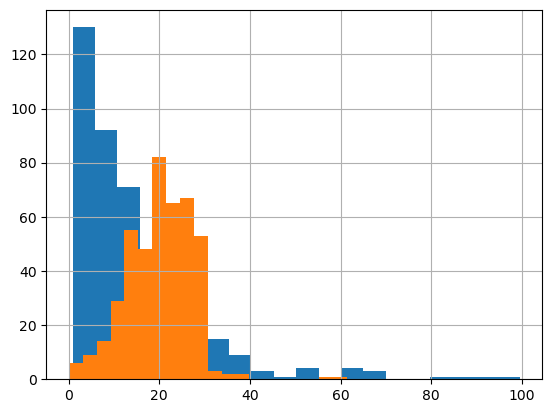

Text(4.444444444444445, 0.5, 'Frequency')

In [16]:
# Plot a histogram of fat in 'pork' foods. 
ax = df_hun[pork_mask]['fat'].astype(float).hist(bins=20);
ax2 = df_hun[pork_mask]['protein'].astype(float).hist(bins=20);
plt.show()
ax.set_xlabel('Fat')
ax.set_ylabel('Frequency')


Let us create a list and store each expression that are separated by commas in the food names.

In [45]:
words = []
for name in df_hun['name']:
    # skip the ones that contain a semi-colon for now
    if ';' in name:
        continue
    # Split the string along commas
    temp = name.split(', ')
    temp = [word.lower() for word in temp]
    words.append(temp)
    temp = []
    
#for word, count in pd.Series(words).value_counts().items():
#    print(word,'-----', count)

In [ ]:
12, 11, 2, 

For every unique word I need a value which would give it's weight. So the input is not just a word but rather a word + a weight. But still, 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample list of food names
food_names = df_hun['name'].tolist()

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF scores
tfidf_matrix = vectorizer.fit_transform(food_names)

# Convert to a DataFrame for easier viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

#print(bb)


In [43]:
df_hun['name'].tolist()

['Cornstarch',
 'Nuts, pecans',
 'Eggplant, raw',
 'Teff, uncooked',
 'Sherbet, orange',
 'Cauliflower, raw',
 'Taro leaves, raw',
 'Lamb, raw, ground',
 'Cheese, camembert',
 'Vegetarian fillets',
 'PACE, Picante Sauce',
 'Goji berries, dried',
 'Mango nectar, canned',
 'Crackers, rusk toast',
 'Chicken, boiled, feet',
 'Quail, raw, meat only',
 'Pie, lemon, fried pies',
 'Peppers, raw, jalapeno',
 'Winged bean tuber, raw',
 'Salami, turkey, cooked',
 'Grapes, raw, muscadine',
 'Nuts, raw, ginkgo nuts',
 'Spices, ground, savory',
 'Candies, sesame crunch',
 'Cheese, low fat, cream',
 'PACE, Green Taco Sauce',
 'Syrup, Canadian, maple',
 'Ostrich, raw, top loin',
 'Chewing gum, sugarless',
 'Nuts, dried, pine nuts',
 'Pasta, unenriched, dry',
 "McDONALD'S, Side Salad",
 'Cookies, Marie biscuit',
 'Broccoli, raw, chinese',
 "McDONALD'S, Hash Brown",
 'Agave, raw (Southwest)',
 'Emu, raw, outside drum',
 'Nuts, dried, beechnuts',
 'Currants, dried, zante',
 'Lentils, raw, sprouted',
 'Gr

In [42]:
for i in tfidf_df:
    print(i)

10
100
11
12
13
14
14028
15
16
19
20
2006
24
25
28
2nd
30
32
34
37
3rd
40
45
48
4th
4x6
50
51
53
59
5th
60
63
65
67
69
70
72
75
80
81
84
85
86
90
93
94
95
96
97
98
99
aa
abalone
abbott
abiyuch
ables
acai
acerola
acid
acorn
acorns
acting
active
added
advance
adzuki
after
agar
agave
agent
agents
agutuk
air
alaska
alaskan
alcohol
alcoholic
ale
alfalfa
alfredo
alimentum
alkali
all
allspice
almond
almonds
aloe
alpen
alpha
alphabet
aluminum
always
amaranth
amber
america
american
amos
amp
analyzed
ancho
anchovy
ancient
and
andrea
anejo
angelfood
anhydrous
animal
animals
anise
anjou
annatto
antelope
anti
antifoaming
antioxidants
any
anymore
apache
apple
applebee
apples
applesauce
approx
approximately
apricot
apricots
aquafina
ar
ara
arby
archway
areas
arepa
arizona
arm
arrowhead
arrowroot
arroz
artichoke
artichokes
artificial
artificially
arugula
as
asadero
ascidians
ascorbic
ash
asiago
asian
asparagus
aspartame
assorted
assortment
assu
atlantic
au
aust
austin
australian
autumn
avenue
average


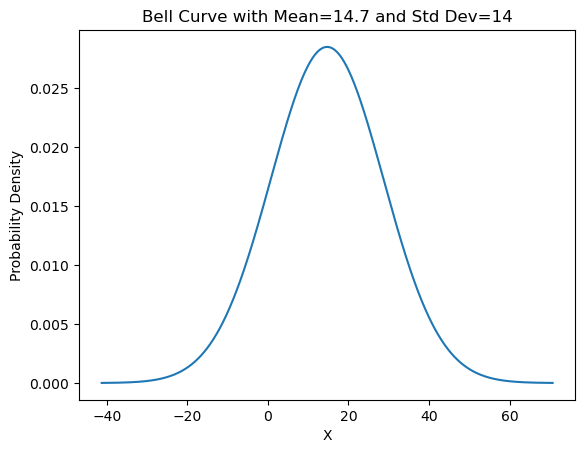

In [97]:
mean, std_dev = 14.7, 14
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

# Plot the bell curve
plt.plot(x, y)
plt.title(f'Bell Curve with Mean={mean} and Std Dev={std_dev}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show()


# about 68% of the data fat in pork would be between 0.7 and 28

In [15]:
for i in df_hun['name']:
    if 'pork' in i:
        print(i.split(', '))

['Salami', 'pork', 'Italian']
['Polish sausage', 'pork']
["Mother's loaf", 'pork']
['Liver cheese', 'pork']
['Frankfurter', 'pork']
['Luxury loaf', 'pork']
['Headcheese', 'pork']
['Olive loaf', 'pork']
['Scrapple', 'pork']
['Bologna', 'pork']
['Salami', 'beef and pork', 'cooked']
['Pulled pork in barbecue sauce']
['Beerwurst', 'pork', 'beer salami']
['Bologna', 'beef', 'pork', 'chicken']
['USDA Commodity', 'canned', 'pork']
['Luncheon meat', 'canned', 'pork']
['Brotwurst', 'link', 'beef', 'pork']
['Sausage', 'raw', 'pork', 'Italian']
['Pork', 'raw', 'salt pork', 'cured']
['Sandwich spread', 'beef', 'pork']
['Bockwurst', 'raw', 'veal', 'pork']
['Barbecue loaf', 'beef', 'pork']
['Snacks', 'plain', 'pork skins']
['Peppered loaf', 'beef', 'pork']
['Salami', 'pork', 'dry or hard']
['Smoked link sausage', 'pork']
['Beerwurst', 'pork and beef']
['Pork', 'pickled pork hocks']
['Gravy', 'powder', 'dry', 'pork']
['Picnic loaf', 'beef', 'pork']
['Bratwurst', 'cooked', 'pork']
['Bologna', 'beef an

In [29]:
# 2.5 = 5/2
# Azzal szorzom meg m-met amivel ha beszoroznám 0.4-et 1-et adna.
# Az egyetlen dolog csak is: 1/0.4 lehet. Ami történetesen 2.5.

In [30]:
#df_hun.to_csv('food_data_clean.csv', sep=';', index=False, header=False)